In [1]:
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics

In [15]:
satellite_6_TP1=pd.read_csv("SatelliteImage_6bands_TP1.csv")
satellite_3_TP1=pd.read_csv("RGBvalues_satellite_TP1_afteroutliers.csv")
rgb_3_TP1=pd.read_csv("RGBuav_TP1.csv")

In [16]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,CrawfordsvilleV2-TP1-4351_10_13,76.707882,77.0,19789176,115.968823,124.0,29917753,71.840636,70.0,18533519,0.242406,0.236364,62536.192305,0.207680,0.212389,53577.547888
1,CrawfordsvilleV2-TP1-4351_10_14,63.634761,60.0,16441695,101.242128,103.0,26158536,61.261638,56.0,15828537,0.251475,0.256351,64975.077138,0.228157,0.240310,58950.217584
2,CrawfordsvilleV2-TP1-4351_10_15,94.582687,99.0,24392402,127.516152,138.0,32885778,84.797332,87.0,21868808,0.184786,0.177994,47655.407368,0.145040,0.149701,37405.187002
3,CrawfordsvilleV2-TP1-4351_10_16,77.862975,78.0,20166744,114.440717,121.0,29640489,71.784423,70.0,18592381,0.223554,0.220544,57901.199796,0.190219,0.196203,49267.174942
4,CrawfordsvilleV2-TP1-4351_10_17,72.752044,70.0,18814115,108.746905,111.0,28122602,65.943099,62.0,17053281,0.234707,0.238095,60696.708831,0.194973,0.209756,50421.207239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,CrawfordsvilleV2-TP1-4353_9_42,91.713689,99.0,22797455,136.158457,154.0,33845180,85.507149,89.0,21254683,0.231182,0.225806,57465.431943,0.197661,0.203704,49132.927254
512,CrawfordsvilleV2-TP1-4353_9_43,88.458671,91.0,22068227,128.827478,140.0,32139235,83.899649,84.0,20930865,0.214964,0.210884,53628.074443,0.183599,0.191977,45803.261933
513,CrawfordsvilleV2-TP1-4353_9_44,104.304750,110.0,25993891,144.930160,161.0,36118190,92.614764,97.0,23080618,0.203289,0.198347,50661.813777,0.161106,0.167742,40149.307240
514,CrawfordsvilleV2-TP1-4353_9_45,90.724570,94.0,22637504,133.270420,145.0,33253502,79.895856,80.0,19935534,0.243118,0.232472,60662.637060,0.194686,0.198413,48577.947579


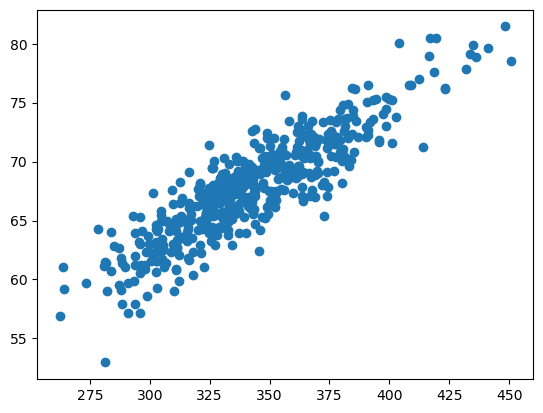

In [17]:
plt.scatter(satellite_6_TP1['Red_mean'], satellite_3_TP1['Red_mean'])

In [18]:
rgb_3_TP1['file_'] = rgb_3_TP1['file_'].str.replace('V2', '')

In [31]:
concatenated_df = pd.merge(satellite_6_TP1, satellite_3_TP1, on='file_', how='outer')
# concatenated_df.rename(columns={concatenated_df.columns[3]:"UAVVI"}, inplace=True)

In [20]:
concatenated_df = pd.merge(rgb_3_TP1,concatenated_df, on='file_', how='outer')

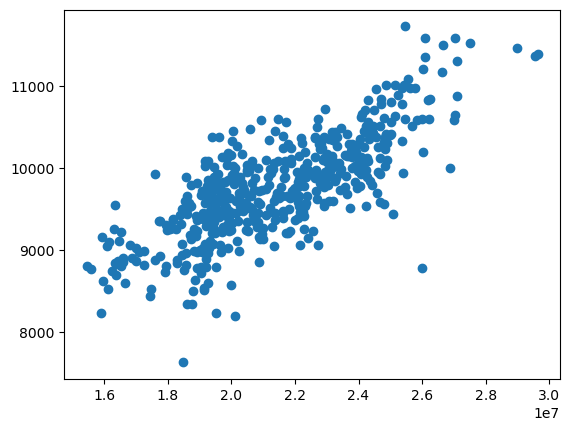

In [21]:
plt.scatter(concatenated_df['Red_sum'], concatenated_df['Red_sum_y'])

In [22]:
rgb_3_TP1

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum
0,Crawfordsville-TP1-4351_10_13,76.707882,77.0,19789176,115.968823,124.0,29917753,71.840636,70.0,18533519,0.242406,0.236364,62536.192305,0.207680,0.212389,53577.547888
1,Crawfordsville-TP1-4351_10_14,63.634761,60.0,16441695,101.242128,103.0,26158536,61.261638,56.0,15828537,0.251475,0.256351,64975.077138,0.228157,0.240310,58950.217584
2,Crawfordsville-TP1-4351_10_15,94.582687,99.0,24392402,127.516152,138.0,32885778,84.797332,87.0,21868808,0.184786,0.177994,47655.407368,0.145040,0.149701,37405.187002
3,Crawfordsville-TP1-4351_10_16,77.862975,78.0,20166744,114.440717,121.0,29640489,71.784423,70.0,18592381,0.223554,0.220544,57901.199796,0.190219,0.196203,49267.174942
4,Crawfordsville-TP1-4351_10_17,72.752044,70.0,18814115,108.746905,111.0,28122602,65.943099,62.0,17053281,0.234707,0.238095,60696.708831,0.194973,0.209756,50421.207239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Crawfordsville-TP1-4353_9_42,91.713689,99.0,22797455,136.158457,154.0,33845180,85.507149,89.0,21254683,0.231182,0.225806,57465.431943,0.197661,0.203704,49132.927254
512,Crawfordsville-TP1-4353_9_43,88.458671,91.0,22068227,128.827478,140.0,32139235,83.899649,84.0,20930865,0.214964,0.210884,53628.074443,0.183599,0.191977,45803.261933
513,Crawfordsville-TP1-4353_9_44,104.304750,110.0,25993891,144.930160,161.0,36118190,92.614764,97.0,23080618,0.203289,0.198347,50661.813777,0.161106,0.167742,40149.307240
514,Crawfordsville-TP1-4353_9_45,90.724570,94.0,22637504,133.270420,145.0,33253502,79.895856,80.0,19935534,0.243118,0.232472,60662.637060,0.194686,0.198413,48577.947579


In [23]:
concatenated_df.columns

Index(['file_', 'Red_mean', 'Red_median', 'Red_sum', 'Green_mean',
       'Green_median', 'Green_sum', 'Blue_mean', 'Blue_median', 'Blue_sum',
       'GLI_mean', 'GLI_median', 'GLI_sum', 'NGRDI_mean', 'NGRDI_median',
       'NGRDI_sum', 'Red_mean_x', 'Red_median_x', 'Red_sum_x', 'Green_mean_x',
       'Green_median_x', 'Green_sum_x', 'Blue_mean_x', 'Blue_median_x',
       'Blue_sum_x', 'GLI_mean_x', 'GLI_median_x', 'GLI_sum_x', 'NGRDI_mean_x',
       'NGRDI_median_x', 'NGRDI_sum_x', 'NDVI_mean', 'NDVI_median', 'NDVI_sum',
       'NDRE_mean', 'NDRE_median', 'NDRE_sum', 'RedEdge_mean',
       'RedEdge_median', 'RedEdge_sum', 'DeepBlue_mean', 'DeepBlue_median',
       'DeepBlue_sum', 'Red_mean_y', 'Red_median_y', 'Red_sum_y',
       'Green_mean_y', 'Green_median_y', 'Green_sum_y', 'Blue_mean_y',
       'Blue_median_y', 'Blue_sum_y', 'GLI_mean_y', 'GLI_median_y',
       'GLI_sum_y', 'NGRDI_mean_y', 'NGRDI_median_y', 'NGRDI_sum_y'],
      dtype='object')

In [18]:
concatenated_df=concatenated_df.loc[concatenated_df['Red_mean_x']<=500] 

In [26]:
concatenated_df=concatenated_df.dropna()

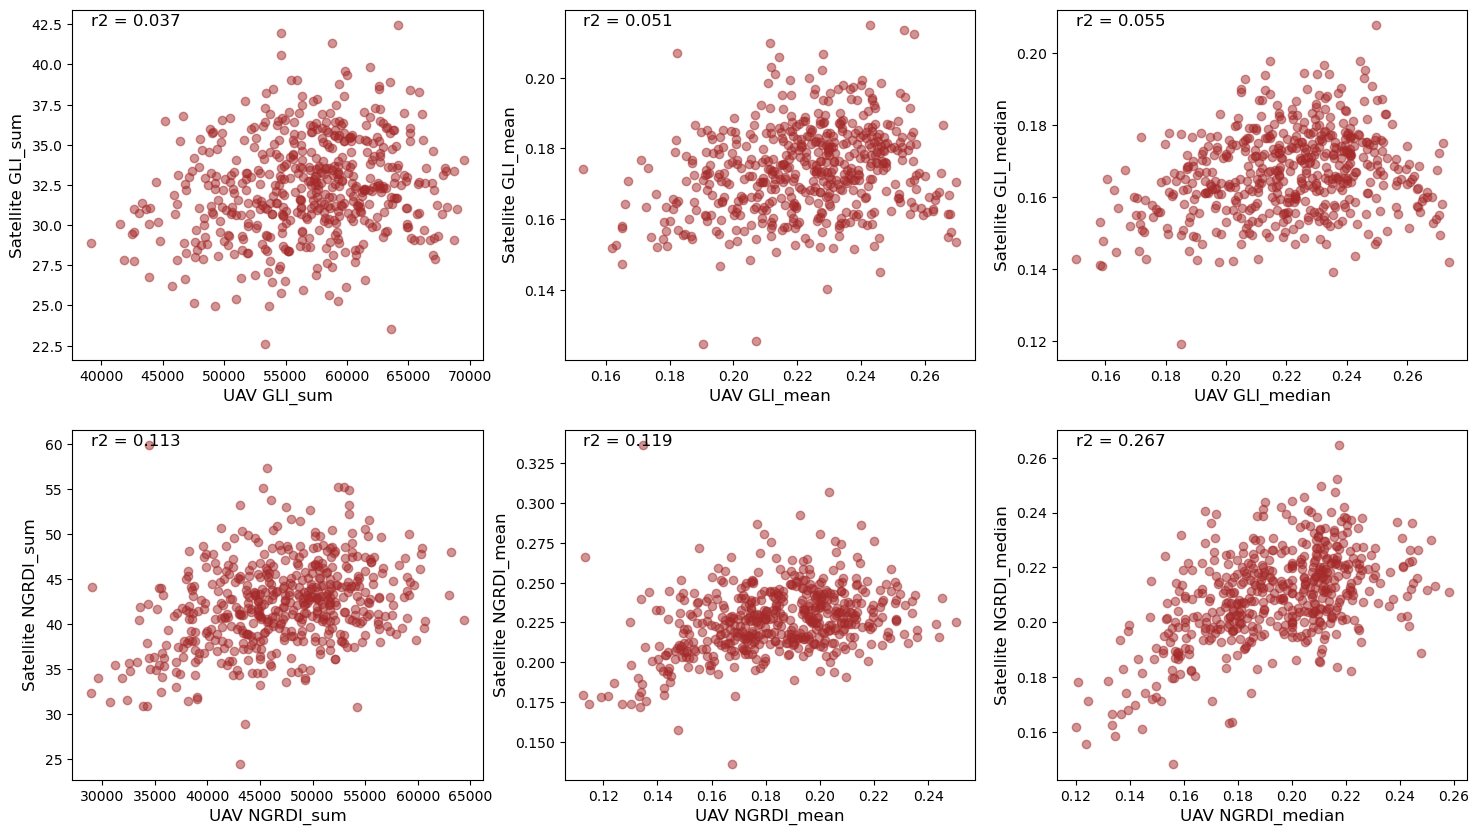

In [30]:
fig = plt.figure(figsize=(18,10))

#GLIsum
myax=fig.add_subplot(2,3,1)
myax.scatter(concatenated_df['GLI_sum'], concatenated_df['GLI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_sum'].tolist(),concatenated_df['GLI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_sum']), max(concatenated_df['GLI_sum_x'])), size=12)
myax.set_ylabel("Satellite GLI_sum",fontsize=12)
myax.set_xlabel("UAV GLI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,2)
myax.scatter(concatenated_df['GLI_mean'], concatenated_df['GLI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_mean'].tolist(),concatenated_df['GLI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_mean']), max(concatenated_df['GLI_mean_x'])), size=12)
myax.set_ylabel("Satellite GLI_mean",fontsize=12)
myax.set_xlabel("UAV GLI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,3)
myax.scatter(concatenated_df['GLI_median'], concatenated_df['GLI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['GLI_median'].tolist(),concatenated_df['GLI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['GLI_median']), max(concatenated_df['GLI_median_x'])), size=12)
myax.set_ylabel("Satellite GLI_median",fontsize=12)
myax.set_xlabel("UAV GLI_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(2,3,4)
myax.scatter(concatenated_df['NGRDI_sum'], concatenated_df['NGRDI_sum_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_sum'].tolist(),concatenated_df['NGRDI_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_sum']), max(concatenated_df['NGRDI_sum_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_sum",fontsize=12)
myax.set_xlabel("UAV NGRDI_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,5)
myax.scatter(concatenated_df['NGRDI_mean'], concatenated_df['NGRDI_mean_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_mean'].tolist(),concatenated_df['NGRDI_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_mean']), max(concatenated_df['NGRDI_mean_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_mean",fontsize=12)
myax.set_xlabel("UAV NGRDI_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(2,3,6)
myax.scatter(concatenated_df['NGRDI_median'], concatenated_df['NGRDI_median_x'], color='brown', alpha=0.5)
r, pval = pearsonr(concatenated_df['NGRDI_median'].tolist(),concatenated_df['NGRDI_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['NGRDI_median']), max(concatenated_df['NGRDI_median_x'])), size=12)
myax.set_ylabel("Satellite NGRDI_median",fontsize=12)
myax.set_xlabel("UAV NGRDI_median", fontsize=12)


plt.savefig("VIs_TP1.png")

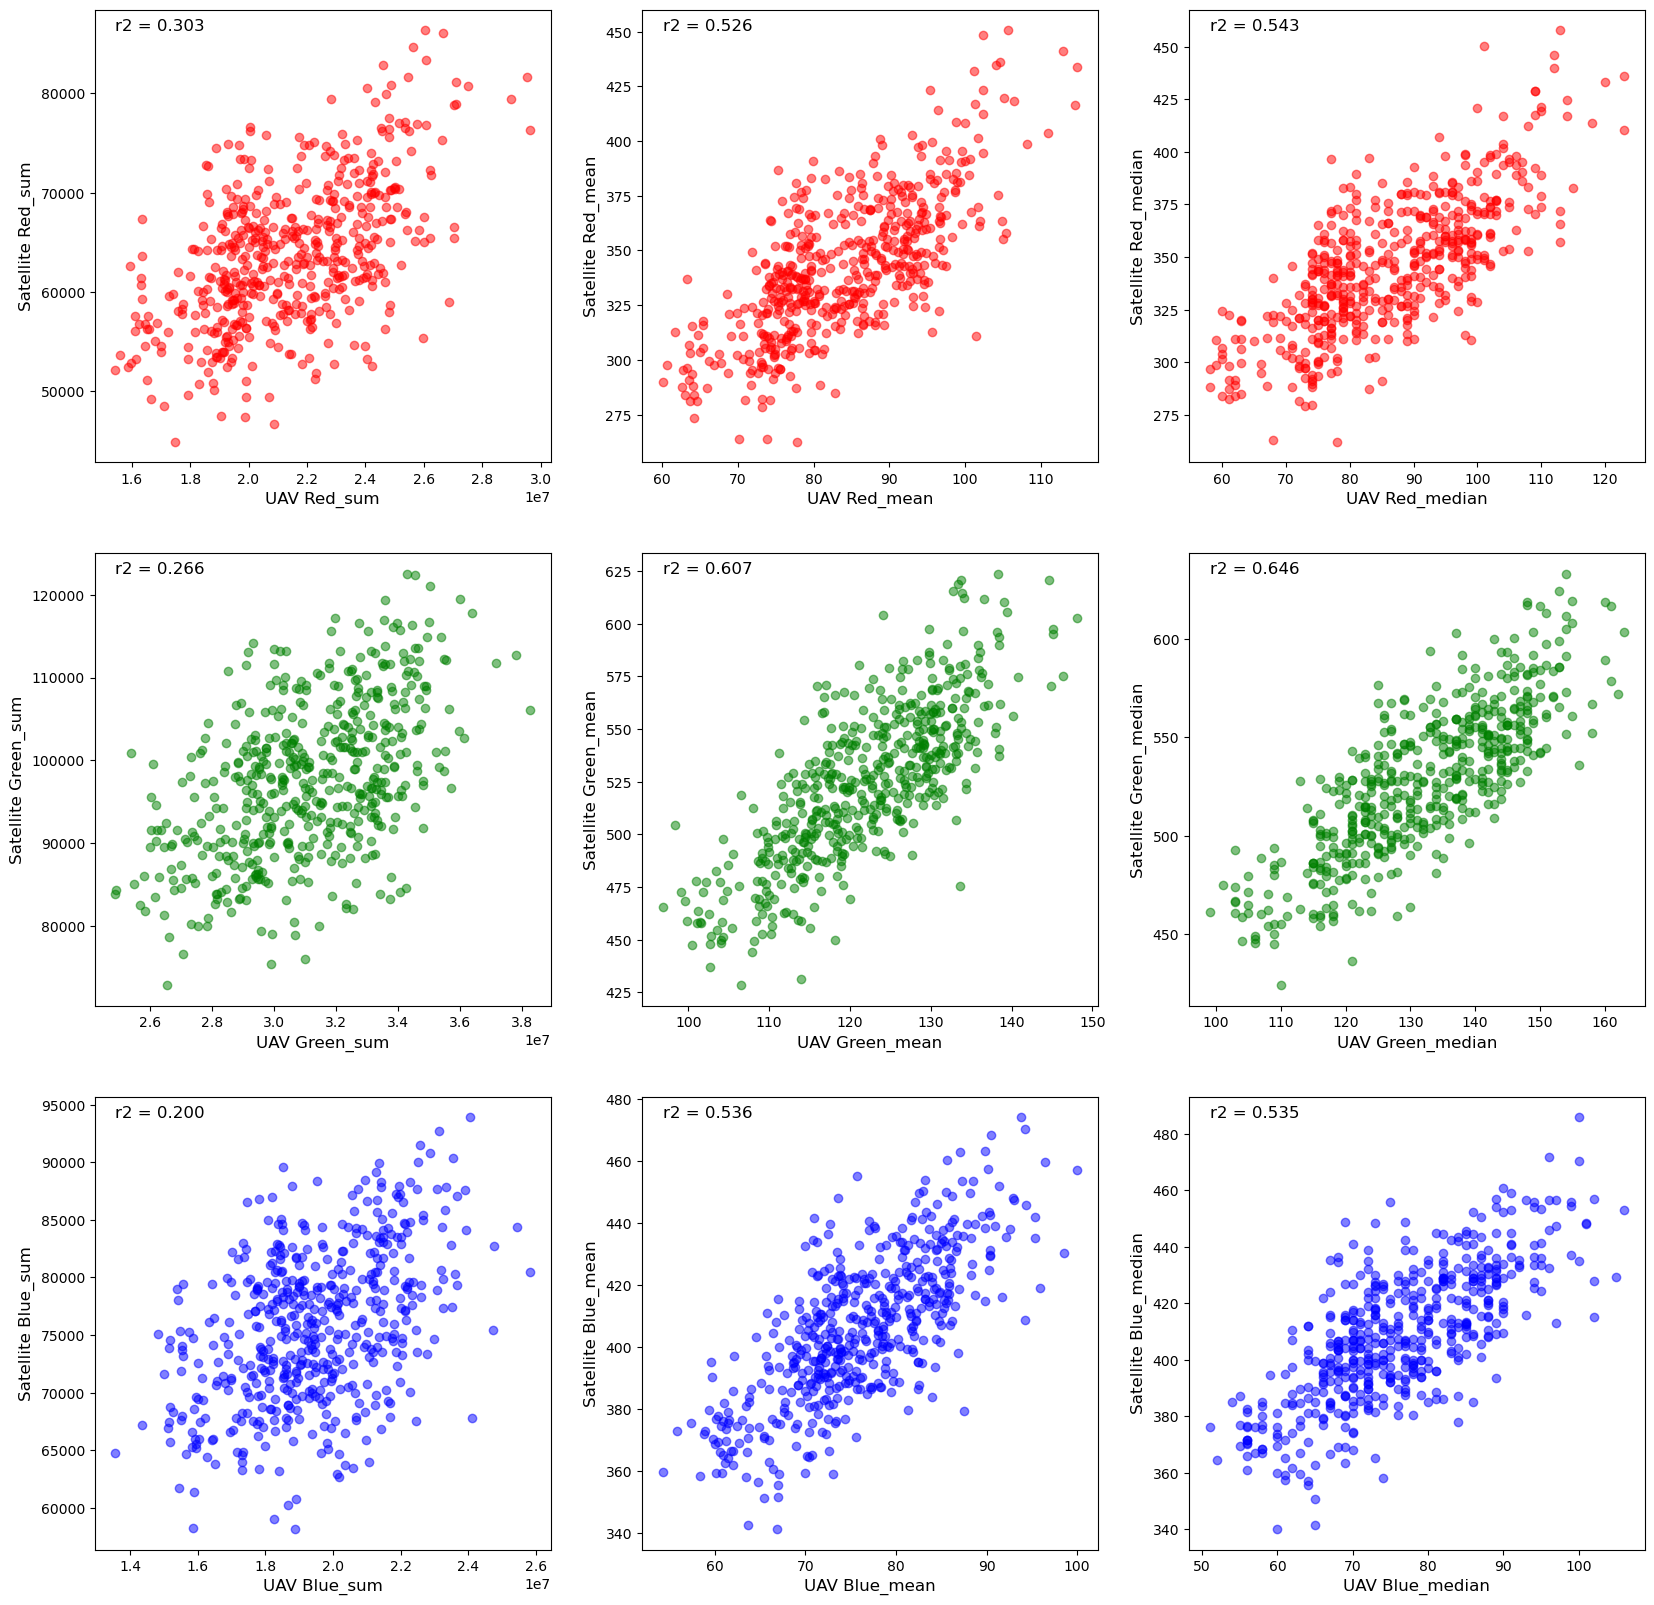

In [29]:
fig = plt.figure(figsize=(20,20))

#GLIsum
myax=fig.add_subplot(3,3,1)
myax.scatter(concatenated_df['Red_sum'], concatenated_df['Red_sum_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_sum'].tolist(),concatenated_df['Red_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_sum']), max(concatenated_df['Red_sum_x'])), size=12)
myax.set_ylabel("Satellite Red_sum",fontsize=12)
myax.set_xlabel("UAV Red_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,2)
myax.scatter(concatenated_df['Red_mean'], concatenated_df['Red_mean_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_mean'].tolist(),concatenated_df['Red_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_mean']), max(concatenated_df['Red_mean_x'])), size=12)
myax.set_ylabel("Satellite Red_mean",fontsize=12)
myax.set_xlabel("UAV Red_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,3)
myax.scatter(concatenated_df['Red_median'], concatenated_df['Red_median_x'], color='red', alpha=0.5)
r, pval = pearsonr(concatenated_df['Red_median'].tolist(),concatenated_df['Red_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Red_median']), max(concatenated_df['Red_median_x'])), size=12)
myax.set_ylabel("Satellite Red_median",fontsize=12)
myax.set_xlabel("UAV Red_median", fontsize=12)

#GLIsum
myax=fig.add_subplot(3,3,4)
myax.scatter(concatenated_df['Green_sum'], concatenated_df['Green_sum_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_sum'].tolist(),concatenated_df['Green_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_sum']), max(concatenated_df['Green_sum_x'])), size=12)
myax.set_ylabel("Satellite Green_sum",fontsize=12)
myax.set_xlabel("UAV Green_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,5)
myax.scatter(concatenated_df['Green_mean'], concatenated_df['Green_mean_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_mean'].tolist(),concatenated_df['Green_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_mean']), max(concatenated_df['Green_mean_x'])), size=12)
myax.set_ylabel("Satellite Green_mean",fontsize=12)
myax.set_xlabel("UAV Green_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,6)
myax.scatter(concatenated_df['Green_median'], concatenated_df['Green_median_x'], color='Green', alpha=0.5)
r, pval = pearsonr(concatenated_df['Green_median'].tolist(),concatenated_df['Green_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Green_median']), max(concatenated_df['Green_median_x'])), size=12)
myax.set_ylabel("Satellite Green_median",fontsize=12)
myax.set_xlabel("UAV Green_median", fontsize=12)


#GLIsum
myax=fig.add_subplot(3,3,7)
myax.scatter(concatenated_df['Blue_sum'], concatenated_df['Blue_sum_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_sum'].tolist(),concatenated_df['Blue_sum_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_sum']), max(concatenated_df['Blue_sum_x'])), size=12)
myax.set_ylabel("Satellite Blue_sum",fontsize=12)
myax.set_xlabel("UAV Blue_sum", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,8)
myax.scatter(concatenated_df['Blue_mean'], concatenated_df['Blue_mean_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_mean'].tolist(),concatenated_df['Blue_mean_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_mean']), max(concatenated_df['Blue_mean_x'])), size=12)
myax.set_ylabel("Satellite Blue_mean",fontsize=12)
myax.set_xlabel("UAV Blue_mean", fontsize=12)

#GLIMean
myax=fig.add_subplot(3,3,9)
myax.scatter(concatenated_df['Blue_median'], concatenated_df['Blue_median_x'], color='Blue', alpha=0.5)
r, pval = pearsonr(concatenated_df['Blue_median'].tolist(),concatenated_df['Blue_median_x'].tolist())
r2 =r**2
myax.annotate("r2 = {:.3f}".format(r2), (min(concatenated_df['Blue_median']), max(concatenated_df['Blue_median_x'])), size=12)
myax.set_ylabel("Satellite Blue_median",fontsize=12)
myax.set_xlabel("UAV Blue_median", fontsize=12)


plt.savefig("ColorChannels_TP1.png")

In [35]:
# plt.scatter(concatenated_df['NGRDI_sum_x'], concatenated_df['NGRDI_sum'])